# **Домашнее задание 5**

Попробуйте обучить нейронную сеть LSTM на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). Опишите, какой результата вы получили? Что помогло вам улучшить ее точность?

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
passengers_data = pd.read_csv("/content/drive/My Drive/Нейронные сети/airline-passengers.csv")
passengers_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


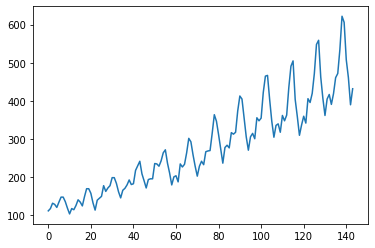

In [58]:
plt.plot(passengers_data['Passengers'])

In [59]:
dataset = passengers_data['Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset[:10]

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119]])

In [60]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min(),dataset.max()

(0.0, 1.0)

In [61]:
train_size = 100
test_size = 44
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [62]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

In [63]:
def get_data(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [64]:
X_test, y_test = get_data(test, look_back)

In [65]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [66]:
X_train.shape

(98, 1, 1)

In [67]:
model = Sequential()
model.add(LSTM(5, input_shape = (1, look_back)))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam", metrics=['mae'])

In [68]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5)                 140       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0370
Epoch 2/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0369
Epoch 3/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0366
Epoch 4/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0365
Epoch 5/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0371
Epoch 6/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0021 - mae: 0.0378
Epoch 7/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0023 - mae: 0.0383
Epoch 8/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0021 - mae: 0.0361
Epoch 9/25
98/98 [==============================] - 0s 4ms/step - loss: 0.0022 - mae: 0.0368
Epoch 10/25
98/98 [==============================] - 0s 3ms/step - loss: 0.0022 - mae: 0.0370
Epoch 11/25
98/98 [==============================] - 0s 3ms/step - lo

In [73]:
y_pred = model.predict(X_test)

In [74]:
y_pred = scaler.inverse_transform(y_pred)
y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

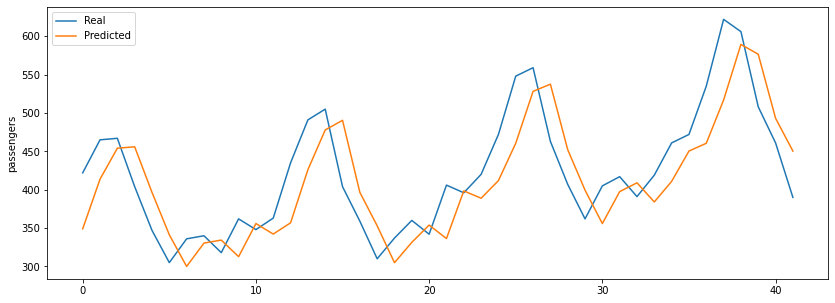

In [75]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label = 'Real')
plt.plot(y_pred, label = 'Predicted')
plt.ylabel('passengers')
plt.legend()
plt.show()

Результат достаточно неплохой если судить по сначению метрики и потерь. На графике мы наблюдаем сдвиг, то есть предсказания запаздывают. Улучшить результат получилось за счет увеличения количества эпох и сокращения количества слоёв до двух.